In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [126]:
a=pd.read_csv('laptops.csv',error_bad_lines=False,encoding='latin-1')

C:\Users\BISHAL SAHA\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [127]:
a

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Analyzing


In [128]:
a.shape

(1303, 13)

In [129]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [130]:
a.isna().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [131]:
a.drop(columns=['Unnamed: 0'],inplace=True)

In [132]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [133]:
a['Ram']=a['Ram'].str.replace("GB","").astype('int32')

In [134]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [135]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int32(1), object(9)
memory usage: 117.2+ KB


In [136]:
a['Weight']=a['Weight'].str.replace("kg","")

In [137]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [138]:
a['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [139]:
a['Price']=a['Price_euros']*82.4

In [140]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,110390.456
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,74072.656
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,47380.000
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,209085.880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,148616.640
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,638.00,52571.200
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,1499.00,123517.600
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,229.00,18869.600
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,62953.600


In [141]:
a.drop(columns=['Price_euros'],inplace=True)

In [142]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,110390.456
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,74072.656
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,47380.000
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,209085.880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,148616.640
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,52571.200
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,123517.600
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,18869.600
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,62953.600


<AxesSubplot:>

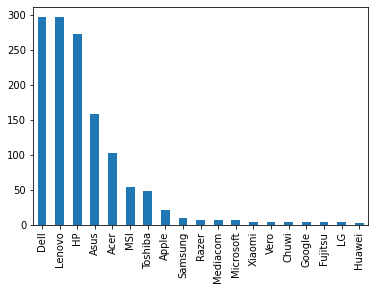

In [143]:
a['Company'].value_counts().plot(kind='bar')

In [144]:
import seaborn as sns

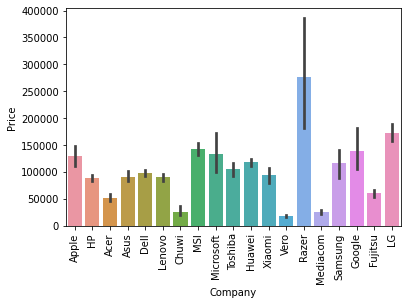

In [145]:
sns.barplot(x=a['Company'],y=a['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\BISHAL SAHA\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

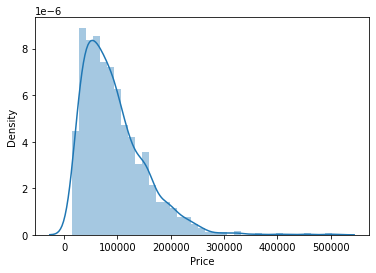

In [146]:
 sns.distplot(a['Price'])

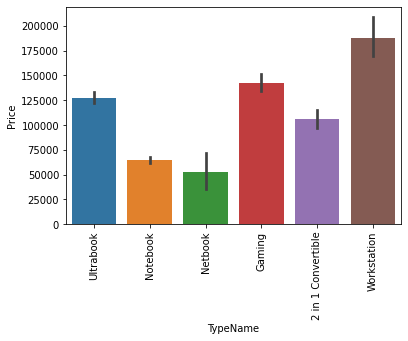

In [147]:
sns.barplot(x=a['TypeName'],y=a['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\BISHAL SAHA\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

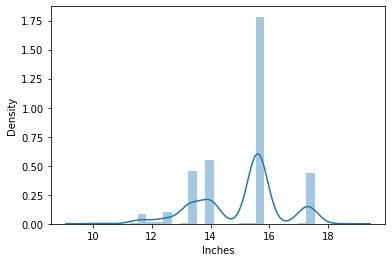

In [148]:
 sns.distplot(a['Inches'])

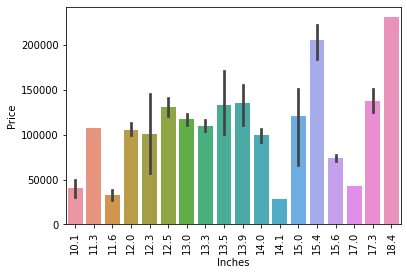

In [149]:
sns.barplot(x=a['Inches'],y=a['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

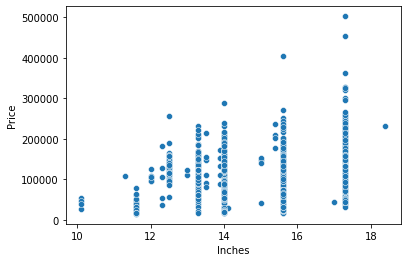

In [150]:
sns.scatterplot(x=a['Inches'],y=a['Price'])

In [151]:
a['Price'].corr

<bound method Series.corr of 0       110390.456
1        74072.656
2        47380.000
3       209085.880
4       148616.640
           ...    
1298     52571.200
1299    123517.600
1300     18869.600
1301     62953.600
1302     30405.600
Name: Price, Length: 1303, dtype: float64>

In [152]:
a.corr()['Price']

Inches    0.068197
Ram       0.743007
Price     1.000000
Name: Price, dtype: float64

In [153]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int32(1), object(9)
memory usage: 117.2+ KB


In [154]:
a['Weight']=a['Weight'].astype('float64')

In [155]:
a.corr()['Price']

Inches    0.068197
Ram       0.743007
Weight    0.210370
Price     1.000000
Name: Price, dtype: float64

In [156]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,110390.456
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,74072.656
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,47380.000
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,209085.880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,148616.640
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,52571.200
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,123517.600
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18869.600
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,62953.600


In [157]:
a['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [158]:
##TouchScreen,IPS,4K ultra HD,FULL HD

In [159]:
a['TouchScreen']=a['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [160]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,110390.456,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,74072.656,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,47380.000,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,209085.880,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,148616.640,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,52571.200,1
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,123517.600,1
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18869.600,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,62953.600,0


In [161]:
a['IPS']=a['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [162]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,110390.456,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,74072.656,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,47380.000,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,209085.880,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,148616.640,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,52571.200,1,1
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,123517.600,1,1
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18869.600,0,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,62953.600,0,0


In [163]:
sample=a['ScreenResolution'].str.split('x',n=1,expand=True)

In [165]:
a['Y_Resolution']=sample[1]
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  Y_Resolution      1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 147.7+ KB


In [166]:
a['Y_Resolution'].astype('int32')

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Y_Resolution, Length: 1303, dtype: int32

In [167]:
sample[0]
import re
a['X_resolution']=sample[0]
sample[0]

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: 0, Length: 1303, dtype: object

In [168]:
a['X_resolution']=a['X_resolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0]).astype('int32')

In [169]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  Y_Resolution      1303 non-null   object 
 15  X_resolution      1303 non-null   int32  
dtypes: float64(3), int32(2), int64(2), object(

In [176]:
a['Y_Resolution']=a['Y_Resolution'].astype('int')

In [177]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  Y_Resolution      1303 non-null   int32  
 15  X_resolution      1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(

In [178]:
a['ppi']=(((a['X_resolution']**2+(a['Y_Resolution']**2))**0.5/a['Inches'])).astype('float64')

In [180]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
 12  TouchScreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  Y_Resolution      1303 non-null   int32  
 15  X_resolution      1303 non-null   int32  
 16  ppi               1303 non-null   float64


In [ ]:
a['Y_Resolution']=a['Y_Resolution'].astype('int')

In [ ]:
a.info()

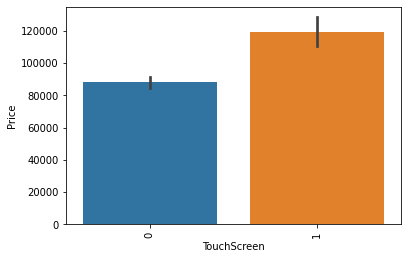

In [181]:
sns.barplot(x=a['TouchScreen'],y=a['Price'])
plt.xticks(rotation='vertical')
plt.show()

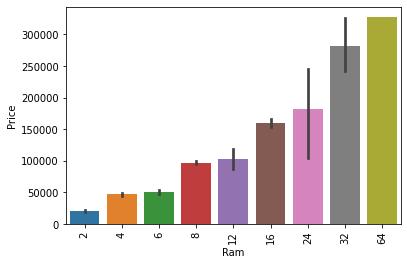

In [182]:
sns.barplot(x=a['Ram'],y=a['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [183]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Y_Resolution,X_resolution,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,110390.456,0,1,1600,2560,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,74072.656,0,0,900,1440,127.677940
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,47380.000,0,0,1080,1920,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,209085.880,0,1,1800,2880,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,148616.640,0,1,1600,2560,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,52571.200,1,1,1080,1920,157.350512
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,123517.600,1,1,1800,3200,276.053530
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18869.600,0,0,768,1366,111.935204
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,62953.600,0,0,768,1366,100.454670


In [184]:
a['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

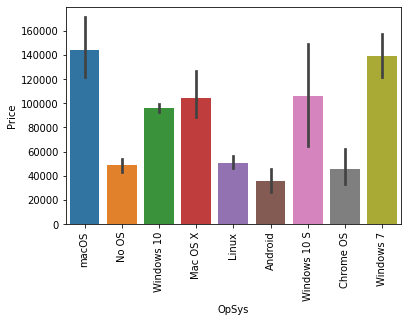

In [185]:
sns.barplot(x=a['OpSys'],y=a['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [186]:
a

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Y_Resolution,X_resolution,ppi
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,110390.456,0,1,1600,2560,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,74072.656,0,0,900,1440,127.677940
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,47380.000,0,0,1080,1920,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,209085.880,0,1,1800,2880,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,148616.640,0,1,1600,2560,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,52571.200,1,1,1080,1920,157.350512
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,123517.600,1,1,1800,3200,276.053530
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18869.600,0,0,768,1366,111.935204
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,62953.600,0,0,768,1366,100.454670


In [187]:
a.drop(columns=['ScreenResolution','X_resolution','Y_Resolution','Inches'],inplace=True)

In [188]:
a

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,110390.456,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,74072.656,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,47380.000,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,209085.880,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,148616.640,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,52571.200,1,1,157.350512
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,123517.600,1,1,276.053530
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18869.600,0,0,111.935204
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,62953.600,0,0,100.454670


In [189]:
a['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [190]:
a['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [191]:
def cpu_obj(text):
    a='Intel Core i5'
    b='Intel Core i7'
    c='Intel Core i3'
    
    if a in text:
        return a
    elif b in text:
        return b
    elif c in text:
        return c
    else:
        if text.split()[0]=='Intel':
            return 'Intel'
        else:
            return 'AMD Processors'

In [192]:
a['Processor']=a['Cpu'].apply(cpu_obj)

In [193]:
a

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18869.600,0,0,111.935204,Intel
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7


In [194]:
a['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [195]:
def Gpu_obj(text):
    a='Intel HD Graphics'
    b='Intel Iris'
    c='Nvidia'
    d='AMD'
    if a in text:
        return a
    elif b in text:
        return b
    elif c in text:
        return c
    elif d in text:
        return d
    else:
        return 'New Graphics'
      

In [196]:
a['GPUs']=a['Gpu'].apply(Gpu_obj)

In [197]:
a

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD


In [198]:
a.drop(columns=['Gpu','Cpu',],inplace=True)

In [200]:
a.drop(columns=['Product'],inplace=True)

In [201]:
a

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics
2,HP,Notebook,8,256GB SSD,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics
1300,Lenovo,Notebook,2,64GB Flash Storage,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics
1301,HP,Notebook,6,1TB HDD,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD


In [202]:
a['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [203]:
def HDD_obj(text):
    a='Intel HD Graphics'
    b='Intel Iris'
    c='Nvidia'
    d='AMD'
    texty=text.split()
    if 'HDD' in texty[-1]:
        return "".join(texty[-2])
    else:
        return 0

In [204]:
a['HDD']=a['Memory'].apply(HDD_obj)

In [205]:
a

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0
2,HP,Notebook,8,256GB SSD,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0
1300,Lenovo,Notebook,2,64GB Flash Storage,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0
1301,HP,Notebook,6,1TB HDD,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1TB


In [206]:
a["HDD"].unique()

array([0, '500GB', '1TB', '2TB', '32GB', '128GB', '1.0TB'], dtype=object)

In [207]:
def SSD_obj(text):
   
    texty=text.split()
    if 'SSD' in texty[-1]:
        a="".join(texty[-2])
        
        return a
        
    else:
        return

In [208]:
a['SSD']=a['Memory'].apply(SDD_obj)

NameError: name 'SDD_obj' is not defined

In [209]:
def SSD_obje(text):
   
    texty=text.split()
    if 'SSD' in texty[-1]:
        return "".join(texty[-2])
    else:
        return 0

In [210]:
a['SSD']=a['Memory'].apply(SDD_obje)

NameError: name 'SDD_obje' is not defined

In [211]:
a['SSD']=a['Memory'].apply(SSD_obj)

In [212]:
a

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128GB
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,None
2,HP,Notebook,8,256GB SSD,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256GB
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512GB
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128GB SSD,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128GB
1299,Lenovo,2 in 1 Convertible,16,512GB SSD,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512GB
1300,Lenovo,Notebook,2,64GB Flash Storage,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,None
1301,HP,Notebook,6,1TB HDD,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1TB,None


In [213]:
a['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [214]:
a.drop(columns=['Memory'],inplace=True)

In [215]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128GB
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,None
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256GB
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512GB
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128GB
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512GB
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,None
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1TB,None


In [216]:
a


,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128GB
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,None
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256GB
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512GB
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128GB
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512GB
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,None
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1TB,None


In [217]:
def SSD_obje(text):
   
    texty=text.split()
    if 'SSD' in texty[-1]:
   
        return "".join(texty[-2])
       
    else:
        return 0

In [218]:
a['SSD']=a['Memory'].apply(SSD_obje)

KeyError: 'Memory'

In [219]:
a['SSD'].unique()

array(['128GB', None, '256GB', '512GB', '32GB', '64GB', '1TB', '16GB',
       '180GB', '240GB', '8GB'], dtype=object)

In [220]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128GB
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,None
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256GB
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512GB
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128GB
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512GB
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,None
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1TB,None


In [221]:
a['Test']=a['HDD'].str.replace("1TB","1000")

In [222]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD,Test
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128GB,NaN
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,None,NaN
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256GB,NaN
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512GB,NaN
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256GB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128GB,NaN
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512GB,NaN
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,None,NaN
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1TB,None,1000


In [223]:
a['HDD']=a['HDD'].str.replace("1TB","1000")

In [224]:
a['HDD']=a['HDD'].str.replace("GB","")

In [225]:
a['HDD']=a['HDD'].fillna(0)

In [226]:
a['HDD']=a['HDD'].str.replace("2TB","2000")

In [227]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD,Test
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,NaN,128GB,NaN
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,NaN,None,NaN
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,NaN,256GB,NaN
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,NaN,512GB,NaN
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,NaN,256GB,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,NaN,128GB,NaN
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,NaN,512GB,NaN
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,NaN,None,NaN
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,None,1000


In [228]:
a['SSD']=a['SSD'].str.replace("1TB","1000")

In [229]:
a['SSD']=a['SSD'].str.replace("GB","")

In [230]:
a['SSD']=a['SSD'].fillna(0)

In [231]:
a['SSD']=a['SSD'].str.replace("2TB","2000")

In [232]:
a


,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD,Test
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,NaN,128,NaN
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,NaN,NaN,NaN
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,NaN,256,NaN
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,NaN,512,NaN
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,NaN,256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,NaN,128,NaN
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,NaN,512,NaN
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,NaN,NaN,NaN
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,NaN,1000


In [233]:
a['SSD'].unique()

array(['128', nan, '256', '512', '32', '64', '1000', '16', '180', '240',
       '8'], dtype=object)

In [234]:
a['HDD'].unique()

array([nan, '500', '1000', '2000', '32', '128', '1.0TB'], dtype=object)

In [235]:
a['HDD']=a['HDD'].str.replace("1.0TB","1000")

C:\Users\BISHAL SAHA\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [236]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD,Test
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,NaN,128,NaN
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,NaN,NaN,NaN
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,NaN,256,NaN
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,NaN,512,NaN
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,NaN,256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,NaN,128,NaN
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,NaN,512,NaN
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,NaN,NaN,NaN
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,NaN,1000


In [237]:
a['HDD'].astype('int32')

ValueError: cannot convert float NaN to integer

In [ ]:
a['SSD'].astype('int32')

In [238]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD,Test
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,NaN,128,NaN
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,NaN,NaN,NaN
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,NaN,256,NaN
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,NaN,512,NaN
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,NaN,256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,NaN,128,NaN
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,NaN,512,NaN
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,NaN,NaN,NaN
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,NaN,1000


In [239]:
a.drop(columns=['Inches','Y_Resolution','X_resolution','Test'],inplace=True)

KeyError: "['Inches' 'Y_Resolution' 'X_resolution'] not found in axis"

In [240]:
a['HDD']=a['HDD'].fillna(0)
a['SSD']=a['SSD'].fillna(0)

In [241]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD,Test
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128,NaN
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,0,NaN
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256,NaN
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512,NaN
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128,NaN
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512,NaN
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,0,NaN
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,0,1000


In [242]:
a['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [243]:
a.to_csv('Laptop_final_dataset')

In [244]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD,Test
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128,NaN
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,0,NaN
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256,NaN
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512,NaN
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128,NaN
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512,NaN
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,0,NaN
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,0,1000


# Model Building

C:\Users\BISHAL SAHA\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: For argument "inplace" expected type bool, received type str.

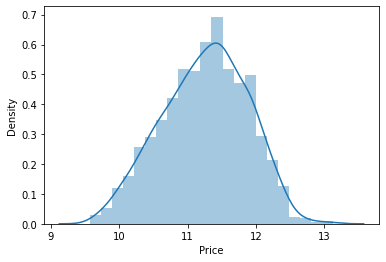

In [252]:
 sns.distplot(np.log(a['Price']))
a.drop(columns=['Test'],inplace='True')


In [257]:
X=a.drop(columns=['Price'])

In [258]:
Y=np.log(a['Price'])

In [253]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD,Test
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128,NaN
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,0,NaN
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256,NaN
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512,NaN
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128,NaN
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512,NaN
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,0,NaN
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,0,1000


In [255]:
a.drop(columns=['Test'],inplace=True)

In [256]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,0
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,0
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,0


In [259]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.004)

In [260]:
X_train.shape

(1297, 12)

In [277]:
from sklearn.compose import ColumnTransformer

In [278]:
from sklearn.pipeline import Pipeline

In [297]:
>>> from sklearn.metrics import r2_score,mean_absolute_error

In [298]:
from sklearn.linear_model import LinearRegression
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   OpSys        1303 non-null   object 
 4   Weight       1303 non-null   float64
 5   Price        1303 non-null   float64
 6   TouchScreen  1303 non-null   int64  
 7   IPS          1303 non-null   int64  
 8   ppi          1303 non-null   float64
 9   Processor    1303 non-null   object 
 10  GPUs         1303 non-null   object 
 11  HDD          1303 non-null   object 
 12  SSD          1303 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(7)
memory usage: 127.4+ KB


In [299]:
a['Company']=a['Company'].astype(str)

In [332]:
X_train.astype(str)

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
11,HP,Notebook,4,No OS,1.86,0,0,141.21199808219862,Intel Core i3,Intel HD Graphics,500,0
148,MSI,Gaming,16,Windows 10,2.9,0,0,127.33567457123111,Intel Core i7,Nvidia,1000,0
1121,HP,Notebook,8,Windows 10,1.16,0,0,165.6321180513006,Intel Core i5,Intel HD Graphics,0,256
603,MSI,Gaming,16,Windows 10,4.14,0,0,127.33567457123111,Intel Core i7,Nvidia,1000,0
1287,HP,Notebook,6,Windows 10,2.19,0,0,100.45466986113651,Intel Core i7,AMD,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,Lenovo,2 in 1 Convertible,8,Windows 10,1.27,1,1,209.8006828649808,Intel Core i7,Intel HD Graphics,0,256
748,Dell,Notebook,8,Windows 10,1.6,0,0,111.93520355955211,Intel Core i5,Intel HD Graphics,0,256
960,Toshiba,Notebook,8,Windows 10,1.2,0,0,165.6321180513006,Intel Core i5,Intel HD Graphics,0,256
914,Acer,Notebook,4,Windows 10,2.4,0,0,141.21199808219862,Intel Core i3,Intel HD Graphics,1000,0


In [316]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [302]:
X_train


,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
11,HP,Notebook,4,No OS,1.86,0,0,141.211998,Intel Core i3,Intel HD Graphics,500,0
148,MSI,Gaming,16,Windows 10,2.90,0,0,127.335675,Intel Core i7,Nvidia,1000,0
1121,HP,Notebook,8,Windows 10,1.16,0,0,165.632118,Intel Core i5,Intel HD Graphics,0,256
603,MSI,Gaming,16,Windows 10,4.14,0,0,127.335675,Intel Core i7,Nvidia,1000,0
1287,HP,Notebook,6,Windows 10,2.19,0,0,100.454670,Intel Core i7,AMD,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,Lenovo,2 in 1 Convertible,8,Windows 10,1.27,1,1,209.800683,Intel Core i7,Intel HD Graphics,0,256
748,Dell,Notebook,8,Windows 10,1.60,0,0,111.935204,Intel Core i5,Intel HD Graphics,0,256
960,Toshiba,Notebook,8,Windows 10,1.20,0,0,165.632118,Intel Core i5,Intel HD Graphics,0,256
914,Acer,Notebook,4,Windows 10,2.40,0,0,141.211998,Intel Core i3,Intel HD Graphics,1000,0


In [309]:
##pielining
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=True,drop='first'),[0,1,3,8,9])
                                     ],remainder='passthrough')
step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_predict=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))
pipe.score(X_train,y_train)

R2 score 0.9221341986998529
MAE 0.14164577745530416


In [310]:
y_Predict=pipe.predict(X_test)
y_Predict

array([10.78748403, 10.0459667 , 11.5395775 , 11.88229034, 11.78095284,
       11.42895807])

In [311]:
y_test

240     10.790012
305     10.297662
1125    11.831565
469     11.938841
458     11.906572
1000    11.550452
Name: Price, dtype: float64

In [312]:
pipe.score(X_train,y_train)

0.8367772445047961

In [ ]:
y_train

In [ ]:
a

In [314]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=True,drop='first'),[0,1,3,8,9])
                                     ],remainder='passthrough')
step2=RandomForestRegressor(n_estimators=100)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_predict=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))

R2 score 0.9202544491604633
MAE 0.15216557994703953


In [315]:
pipe.score(X_train,y_train)

0.9811776236490312

In [318]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=True,drop='first'),[0,1,3,8,9])
                                     ],remainder='passthrough')
step2=KNeighborsRegressor(n_neighbors=5)

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_predict=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))

R2 score 0.9223197799592918
MAE 0.16838822818151744


In [319]:
pipe.score(X_train,y_train)

0.8646941964129337

In [320]:
a.to_csv('LAPTOPFINALLLL.csv')

In [325]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=True,drop='first'),[0,1,3,8,9])
                                     ],remainder='passthrough')
step2=DecisionTreeRegressor()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_predict=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))

R2 score 0.886027570060644
MAE 0.17909449621633686


In [326]:
pipe.score(X_train,y_train)

0.9960472750513806

In [323]:
step1=ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=True,drop='first'),[0,1,3,8,9])
                                     ],remainder='passthrough')
step2=SVR(kernel='rbf')

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])
pipe.fit(X_train,y_train)
y_predict=pipe.predict(X_test)
print('R2 score',r2_score(y_test,y_predict))
print('MAE',mean_absolute_error(y_test,y_predict))

R2 score 0.6264499248738691
MAE 0.346016528724524


In [324]:
pipe.score(X_train,y_train)

0.47901666563957546

In [327]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,0
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,0
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,0


In [328]:
import pickle

In [329]:
pickle.dump(a,open('laptop_dataframe.pkl','wb'))

In [330]:
pickle.dump(pipe,open('laptop_pipe.pkl','wb'))

In [331]:
a

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
0,Apple,Ultrabook,8,macOS,1.37,110390.456,0,1,226.983005,Intel Core i5,Intel Iris,0,128
1,Apple,Ultrabook,8,macOS,1.34,74072.656,0,0,127.677940,Intel Core i5,Intel HD Graphics,0,0
2,HP,Notebook,8,No OS,1.86,47380.000,0,0,141.211998,Intel Core i5,Intel HD Graphics,0,256
3,Apple,Ultrabook,16,macOS,1.83,209085.880,0,1,220.534624,Intel Core i7,AMD,0,512
4,Apple,Ultrabook,8,macOS,1.37,148616.640,0,1,226.983005,Intel Core i5,Intel Iris,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows 10,1.80,52571.200,1,1,157.350512,Intel Core i7,Intel HD Graphics,0,128
1299,Lenovo,2 in 1 Convertible,16,Windows 10,1.30,123517.600,1,1,276.053530,Intel Core i7,Intel HD Graphics,0,512
1300,Lenovo,Notebook,2,Windows 10,1.50,18869.600,0,0,111.935204,Intel,Intel HD Graphics,0,0
1301,HP,Notebook,6,Windows 10,2.19,62953.600,0,0,100.454670,Intel Core i7,AMD,1000,0


In [333]:
X_train

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,ppi,Processor,GPUs,HDD,SSD
11,HP,Notebook,4,No OS,1.86,0,0,141.211998,Intel Core i3,Intel HD Graphics,500,0
148,MSI,Gaming,16,Windows 10,2.90,0,0,127.335675,Intel Core i7,Nvidia,1000,0
1121,HP,Notebook,8,Windows 10,1.16,0,0,165.632118,Intel Core i5,Intel HD Graphics,0,256
603,MSI,Gaming,16,Windows 10,4.14,0,0,127.335675,Intel Core i7,Nvidia,1000,0
1287,HP,Notebook,6,Windows 10,2.19,0,0,100.454670,Intel Core i7,AMD,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1149,Lenovo,2 in 1 Convertible,8,Windows 10,1.27,1,1,209.800683,Intel Core i7,Intel HD Graphics,0,256
748,Dell,Notebook,8,Windows 10,1.60,0,0,111.935204,Intel Core i5,Intel HD Graphics,0,256
960,Toshiba,Notebook,8,Windows 10,1.20,0,0,165.632118,Intel Core i5,Intel HD Graphics,0,256
914,Acer,Notebook,4,Windows 10,2.40,0,0,141.211998,Intel Core i3,Intel HD Graphics,1000,0
